In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

The dataset contains 10,000 entries and 14 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values.

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df2= df.drop(columns=["RowNumber","CustomerId","Surname"])

The columns "RowNumber", "CustomerId", and "Surname" were dropped from the dataset because they are unique identifiers that do not provide meaningful insights for analysis. These columns do not contribute to understanding customer behavior or predicting churn. Removing them simplifies the dataset, focusing on relevant features.

In [9]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


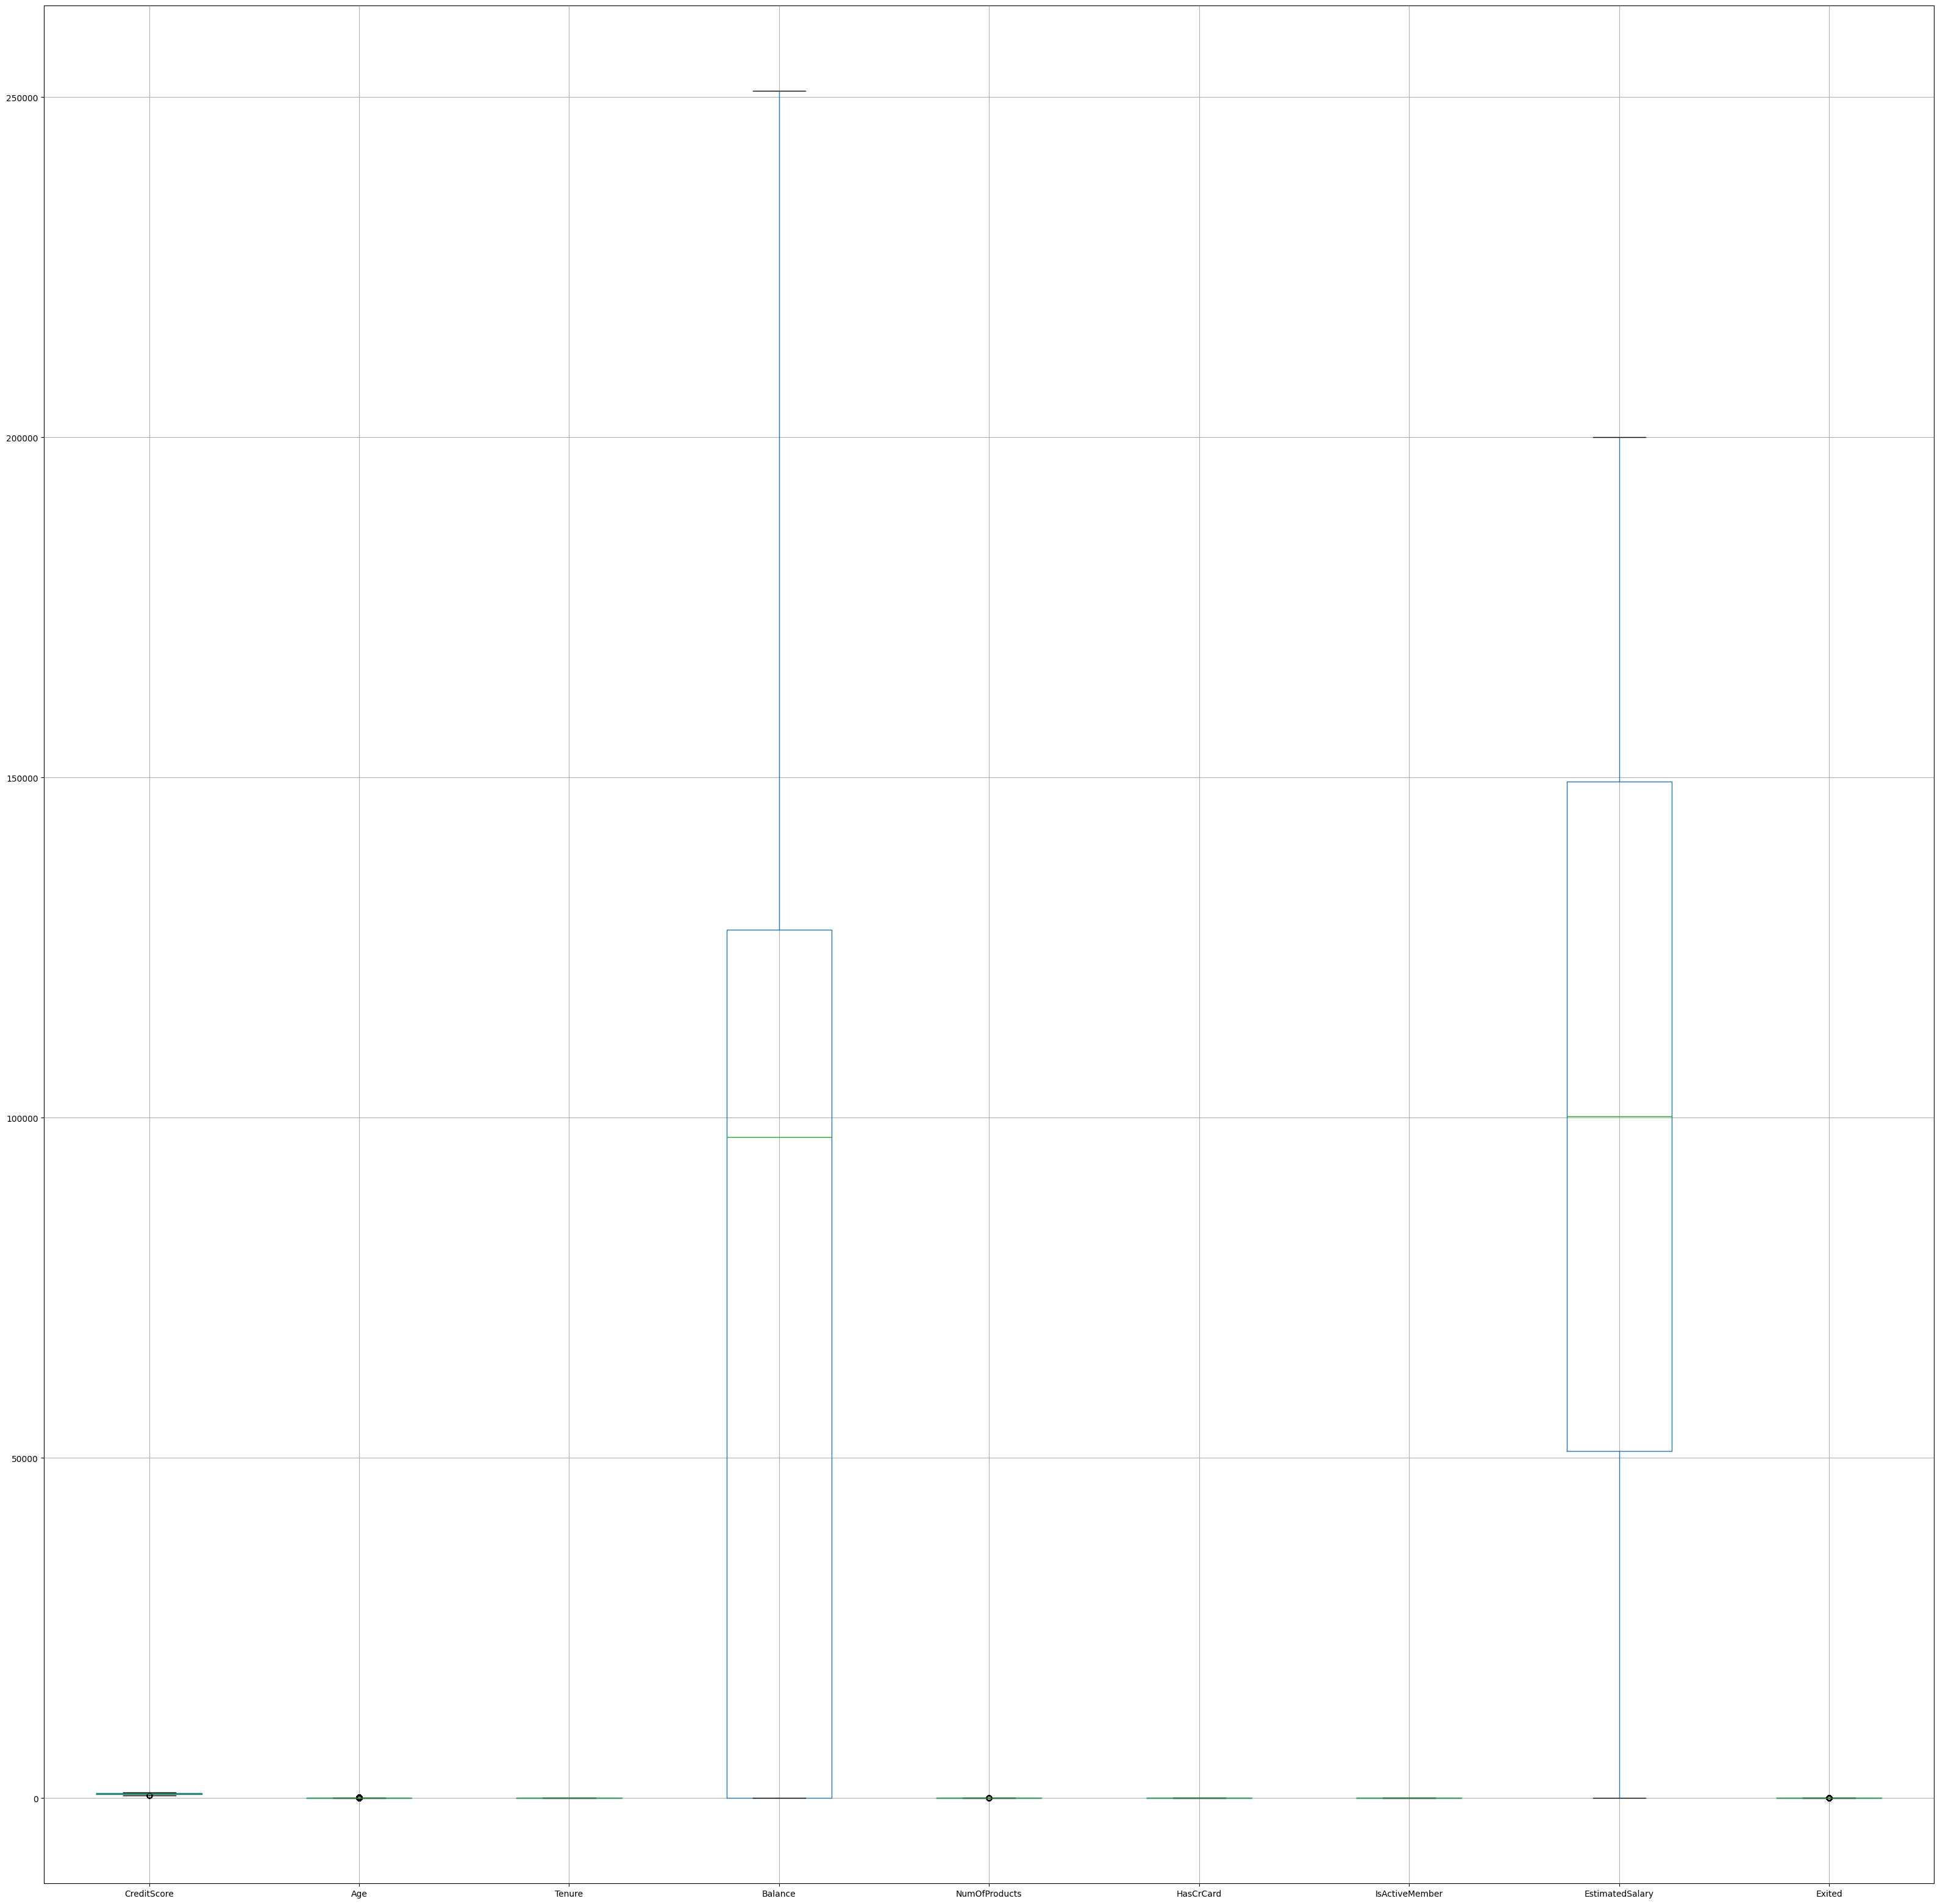

In [10]:
# boxplot to find out outliers
fig, ax = plt.subplots(figsize=(40, 40))

# Plot the box plots for all columns
df2.boxplot(ax=ax)

# Show the plot
plt.show()

Statistical Analysis: The variables like CreditScore, Age, Tenure, NumOfProducts has a narrow IQR,  with outliers detected at both ends of the distributions. Balance variable has a broader IQR, indicating significant variability among the customer balances. Many customers have zero balance and there are substantial outliers at the higher end, suggests that few customers have large balances. Likewise EstimatedSalary has a broader IQR, which indicate wide variability in customer salaries.

**Business Perspective to handle outliers:**

1. **CreditScore:** It is typically ranged between 300 and 850. Outliers at the lower end (below 400) might represent high-risk customers, while scores above 800 indicate very low-risk customers. These extremes can be important for decision-making in lending or risk management rather than being treated as statistical anomalies.

2. **Age:** While ages above 60 or below 20 might be statistical outliers, from a business perspective, they can represent important segments of the customer base, such as retirees or young adults. These age groups could have different financial needs and behaviors.

3. **Tenure:** Customers with very short or very long tenures could be outliers statistically, but they represent new customers or loyal, long-term customers, respectively. Understanding these groups is crucial for customer retention strategies.

4. **Balance:** Extremely high balances might be outliers statistically, but from a business perspective, these customers could be very valuable. Similarly, customers with zero balance could represent a risk of churn or different account usage patterns that are important to understand.

5. **NumOfProducts:** Customers with a very high number of products might be rare, but they represent highly engaged customers. This information is valuable for cross-selling and customer relationship management.

6. **EstimatedSalary:** High salaries might be statistical outliers, but these customers could be key targets for premium services. Similarly, customers with very low salaries might need different financial products and services.

In [11]:
categorical_vars = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']
continuous_vars =  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

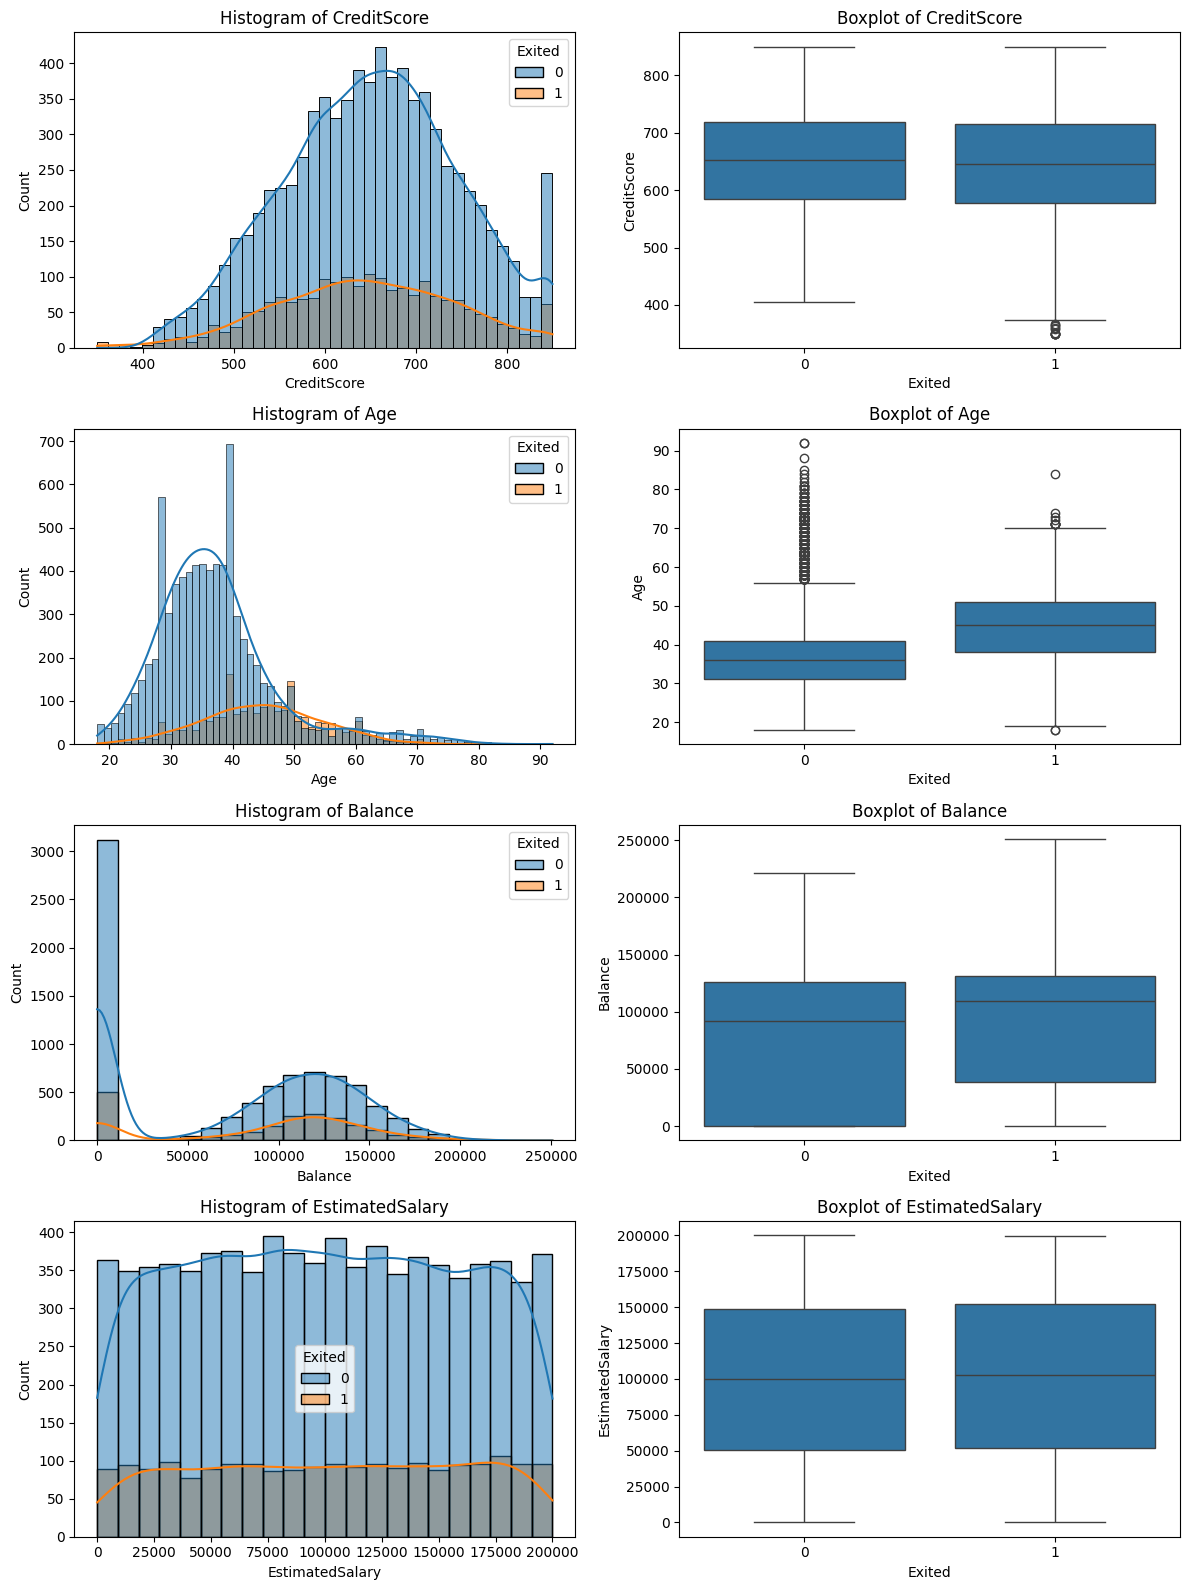

In [12]:
# Set up the figure with subplots
fig, axes = plt.subplots(len(continuous_vars), 2, figsize=(12, len(continuous_vars) * 4))

for i, var in enumerate(continuous_vars):
    # Histogram
    sns.histplot(data=df2, x=var, hue='Exited', ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {var}')

    # Boxplot
    sns.boxplot(data=df2, x='Exited', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

Histogram and Boxplot of CreditScore
Histogram:

The distribution of credit scores shows a peak around 600-700.
Customers who have exited (Exited = 1) generally have lower credit scores compared to those who have not exited (Exited = 0).

Boxplot:

The median credit score is slightly higher for customers who stayed.
There are several outliers on the lower end for both exited and non-exited customers, but more pronounced for exited customers.

Histogram and Boxplot of Age
Histogram:

The age distribution peaks around 30-40 years.
A significant proportion of customers who exited are older (above 50 years), suggesting age might influence churn.

Boxplot:

The median age is higher for customers who exited.
There are many outliers in the age distribution for both exited and non-exited customers, especially among older age groups.

Histogram and Boxplot of Balance
Histogram:

Many customers have a balance close to zero.
Customers with higher balances (above 100,000) are more likely to have exited.

Boxplot:

The median balance is higher for customers who exited, but the overall distribution is similar for both groups.
There are several high-value outliers in both groups, indicating significant variability in account balances.

Histogram and Boxplot of EstimatedSalary
Histogram:

The estimated salary is uniformly distributed across the range.
The exit rate does not appear to vary significantly across different salary ranges, indicating salary might not be a strong predictor of churn.

Boxplot:

The median estimated salary is almost identical for both exited and non-exited customers.
There are no significant outliers in the salary distribution, and the interquartile ranges are similar for both groups.

CreditScore: Lower credit scores are associated with a higher likelihood
of churn.

Age: Older customers tend to have a higher churn rate.

Balance: Higher balances are associated with a higher likelihood of churn.

EstimatedSalary: Salary does not significantly impact churn, as the distribution is uniform across exited and non-exited groups.

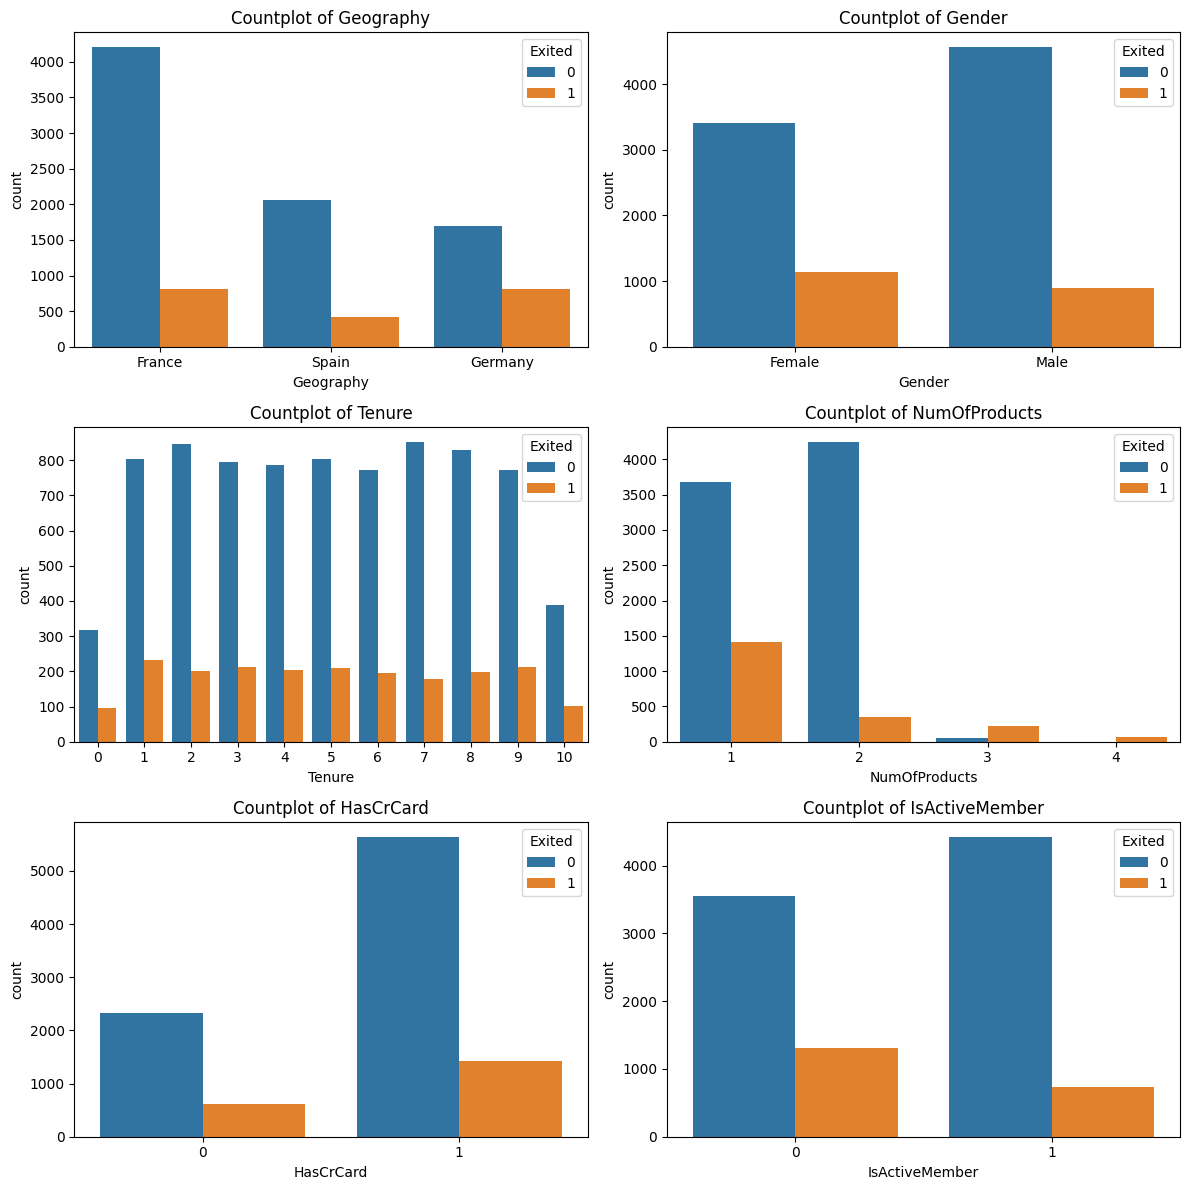

In [13]:
# Set up the figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 2)  # Determine the row and column position
    sns.countplot(data=df2, x=var, hue='Exited', ax=axes[row, col])
    axes[row, col].set_title(f'Countplot of {var}')

plt.tight_layout()
plt.show()

**Countplot of Geography**

France: Most customers are from France, with a relatively smaller proportion exiting.

Spain: Fewer customers compared to France, but the exit rate is similar.

Germany: Has fewer customers than France but a higher proportion of exits, indicating a higher churn rate.

**Countplot of Gender**

Female: The count of female customers is lower than male customers, but the proportion of exits is higher.

Male: More male customers overall, with a lower proportion exiting compared to females.

**Countplot of Tenure**

Tenure: The distribution of tenure is fairly even, but exits are higher for customers with very short (0-1 years) and very long (9-10 years) tenures. This suggests that new customers and those with the longest relationships are more likely to churn.

**Countplot of NumOfProducts**

1 Product: The majority of customers have only one product, with a notable number exiting.

2 Products: A smaller number of customers have two products, but the exit rate is also significant.

3 or 4 Products: Very few customers have three or four products, with a low exit rate, indicating high engagement and lower churn.

**Countplot of HasCrCard**

No Credit Card: Customers without a credit card have a higher exit rate compared to those with a credit card.

Has Credit Card: The majority of customers have a credit card, and their exit rate is lower.

**Countplot of IsActiveMember**

Not Active: Customers who are not active members have a higher exit rate.

Active Member: Active members are less likely to exit, indicating engagement is crucial for retention.

Geography: German customers have a higher churn rate, suggesting that region-specific factors might influence customer retention.

Gender: Female customers are more likely to churn than male customers.

Tenure: Both very new and long-term customers show higher churn rates, possibly indicating onboarding issues and changing needs over time.

NumOfProducts: Customers with only one product are more likely to churn, while those with more products are more engaged and less likely to leave.

HasCrCard: Having a credit card is associated with lower churn, possibly due to higher engagement or satisfaction.

IsActiveMember: Active members are less likely to churn, highlighting the importance of customer engagement.

In [14]:
#Count people having 0 balance in their accounts.
zero_balance_count = df2[df2['Balance'] == 0].shape[0]
total_customers = df2.shape[0]
zero_balance_percentage = (zero_balance_count / total_customers) * 100

print(f"Number of customers with zero balance: {zero_balance_count}")
print(f"Percentage of customers with zero balance: {zero_balance_percentage:.2f}%")

Number of customers with zero balance: 3617
Percentage of customers with zero balance: 36.17%


There are 36.17% of customers that have 0 balance in their account.

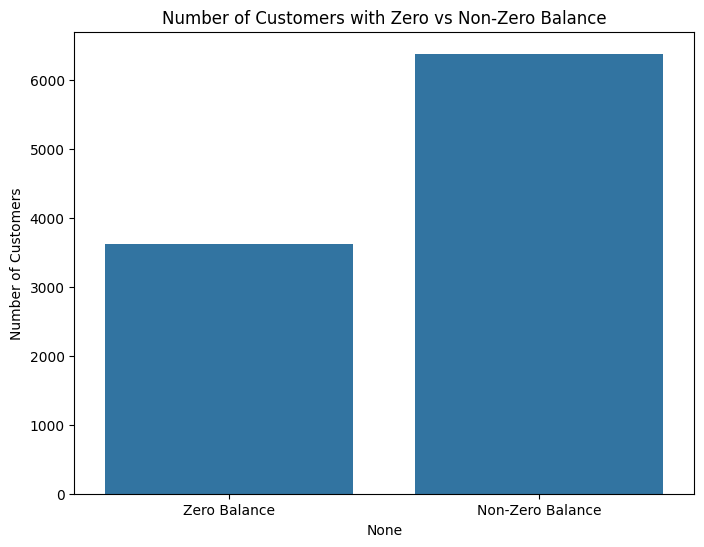

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
balance_counts = pd.Series([zero_balance_count, total_customers - zero_balance_count], index=['Zero Balance', 'Non-Zero Balance'])

# Plotting the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=balance_counts.index, y=balance_counts.values)
plt.title('Number of Customers with Zero vs Non-Zero Balance')
plt.ylabel('Number of Customers')
plt.show()

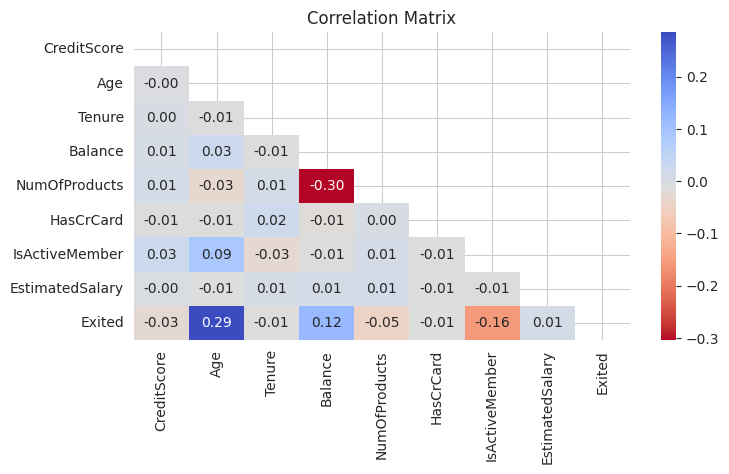

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Calculate the correlation matrix
correlation_matrix = df2[numerical_features].corr()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a figure and axis
plt.figure(figsize=(8, 4))

# Create a heatmap of the correlation matrix with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", mask=mask)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Analyzing the correlation matrix, we can make the following conclusions:

Age and Exited (0.29): There is a weak positive correlation between a customer's age and the likelihood of churn. This suggests that older customers may be slightly more likely to churn compared to younger customers.

Balance and NumOfProducts (-0.30): There is a moderate negative correlation between the number of products a customer has and their account balance. This indicates that customers with more products tend to have lower account balances.

Balance and Exited (0.12): There is a weak positive correlation between a customer's account balance and the likelihood of churn. This suggests that customers with higher account balances may be slightly more likely to churn.

IsActiveMember and Exited (-0.16): There is a weak negative correlation between whether a customer is an active member and the likelihood of churn. This indicates that inactive members may be slightly more likely to churn.

Remaining correlations close to 0: The remaining correlations being close to 0 indicate that there is no correlation between them. This does not mean that there is no relationship at all, as there could still be nonlinear relationships or interactions between variables that are not captured by the correlation coefficient.

In [17]:
# Define the features and target variable
X = df2.drop(['Exited'], axis=1)
y = df2['Exited']

# Unique value counts for each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


Handling Categorical Variables: Encode categorical features like Geography and Gender.

In [18]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns for scaling
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply scaling
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [20]:
z_scores = np.abs((X[numerical_features] - X[numerical_features].mean()) / X[numerical_features].std())

In [21]:
outliers_2_std = (z_scores > 2).sum()
print("Outliers beyond 2 standard deviations:")
print(outliers_2_std)

Outliers beyond 2 standard deviations:
CreditScore        500
Age                526
Tenure               0
Balance             30
NumOfProducts      326
EstimatedSalary      0
dtype: int64


In [22]:
outliers_3_std = (z_scores > 3).sum()
print("Outliers beyond 3 standard deviations:")
print(outliers_3_std)

Outliers beyond 3 standard deviations:
CreditScore          8
Age                133
Tenure               0
Balance              0
NumOfProducts       60
EstimatedSalary      0
dtype: int64


In [23]:
# Assuming df2 is the DataFrame after feature engineering and contains the 'Exited' column
y = df2['Exited']

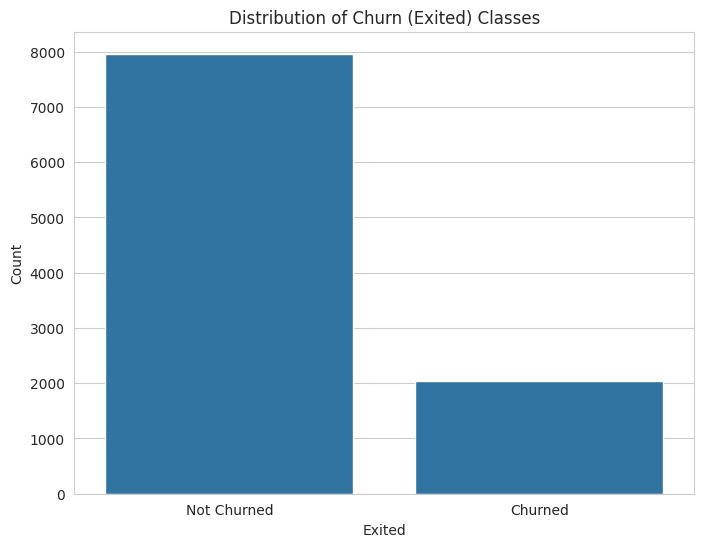

In [24]:
# Plot histogram to check for class imbalance in the 'Exited' column
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Churn (Exited) Classes')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [25]:
# Print the counts of each class to check for imbalance
class_counts = y.value_counts()
print("Class Counts:")
print(class_counts)
print("\nClass Percentages:")
print(class_counts / len(y) * 100)

Class Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Class Percentages:
Exited
0    79.63
1    20.37
Name: count, dtype: float64


The dataset does not exhibit class imbalance based on 10% criterion. Both classes are well-represented, allowing for robust model training and evaluation.